Project Title: Web Traffic Analysis for Ad Campaign Optimization


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv(r"C:\Users\ankit\Downloads\WebAnalytics_Data-Python.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

#checking first 5 rows of the dataset
data.head(5)

Missing Values:
VistID            0
Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
Country_Name      0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Year              0
Clicked           0
dtype: int64


,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [21]:
# Calculate basic statistics for numeric columns
numeric_columns = ['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']

statistics = data[numeric_columns].describe()

# Explore the distribution of 'Clicked' column (assuming 'Clicked' is binary, 0 or 1)
clicked_distribution = data['Clicked'].value_counts(normalize=True)

# Print the basic statistics
print("Descriptive Statistics for Numeric Columns:")
print(statistics)

# Print the click-through rate distribution
print("\nClick-Through Rate Distribution:")
print(clicked_distribution)


Descriptive Statistics for Numeric Columns:
        Time_Spent          Age    Avg_Income  Internet_Usage
count  6657.000000  6657.000000   6657.000000     6657.000000
mean     66.849548    37.258825  55930.486743      184.947684
std      15.509672    10.995458  13110.339257       43.189896
min      32.600000    19.000000  13996.500000      104.780000
25%      55.200000    28.000000  48454.000000      145.730000
50%      70.660000    36.000000  58183.000000      193.580000
75%      79.570000    46.000000  65957.000000      222.260000
max      91.430000    61.000000  79484.800000      269.960000

Click-Through Rate Distribution:
0    0.543638
1    0.456362
Name: Clicked, dtype: float64


Average Time Spent on the Website: 66.85 minutes

Age Demographics:
18-24    1135
25-34    1993
35-44    1731
45-54    1443
55-64     355
65-74       0
75-84       0
Name: Age, dtype: int64

Peak Time Periods:
Early-Morning     674
Evening          1266
Mid-Night        1145
Morning          1228
Night            1140
Noon             1204
Name: Time_Period, dtype: int64


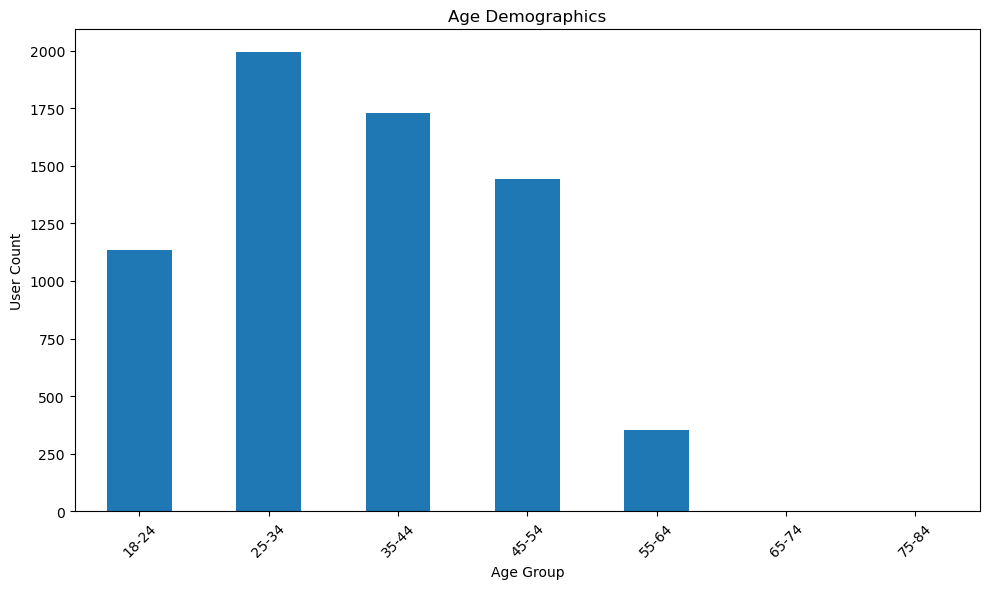

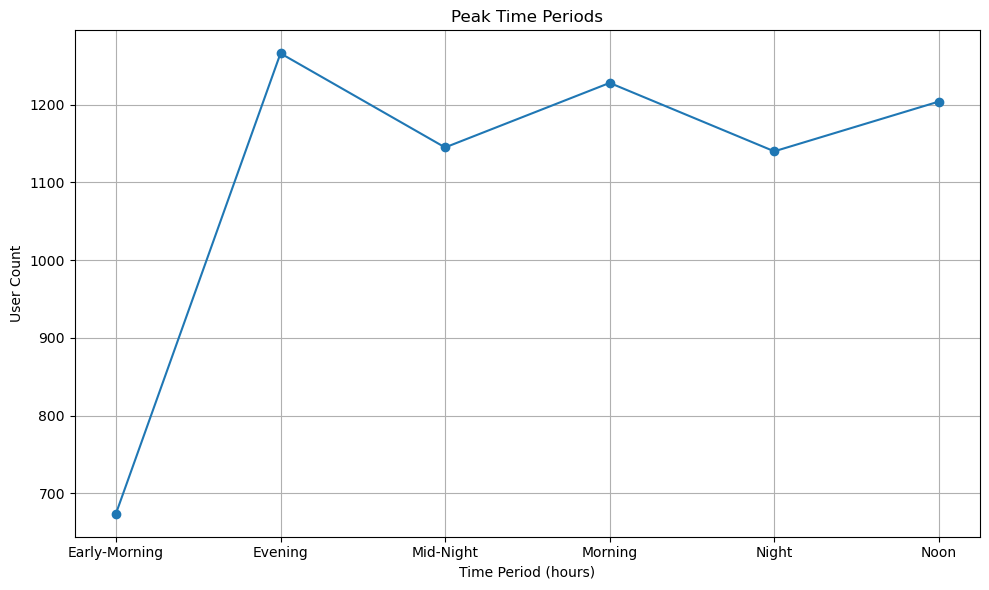

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# User Behavior Analysis

# 1. Determine the average time spent on the website
average_time_spent = data['Time_Spent'].mean()
print(f"Average Time Spent on the Website: {average_time_spent:.2f} minutes")

# 2. Age demographics of users
# You can create age groups (e.g., 18-24, 25-34, 35-44, etc.) and count users in each group.
age_groups = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84'])
age_demographics = age_groups.value_counts().sort_index()
print("\nAge Demographics:")
print(age_demographics)


# 3. Identify peak time periods when users are most active
# Assuming Time_Period is in hours (e.g., 0-23)
peak_time_periods = data['Time_Period'].value_counts().sort_index()
print("\nPeak Time Periods:")
print(peak_time_periods)

# Plotting

# Age demographics bar chart
plt.figure(figsize=(10, 6))
age_demographics.plot(kind='bar', rot=45)
plt.title('Age Demographics')
plt.xlabel('Age Group')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

# Peak time periods line chart
plt.figure(figsize=(10, 6))
peak_time_periods.plot(kind='line', marker='o')
plt.title('Peak Time Periods')
plt.xlabel('Time Period (hours)')
plt.ylabel('User Count')
plt.grid(True)
plt.tight_layout()
plt.show()


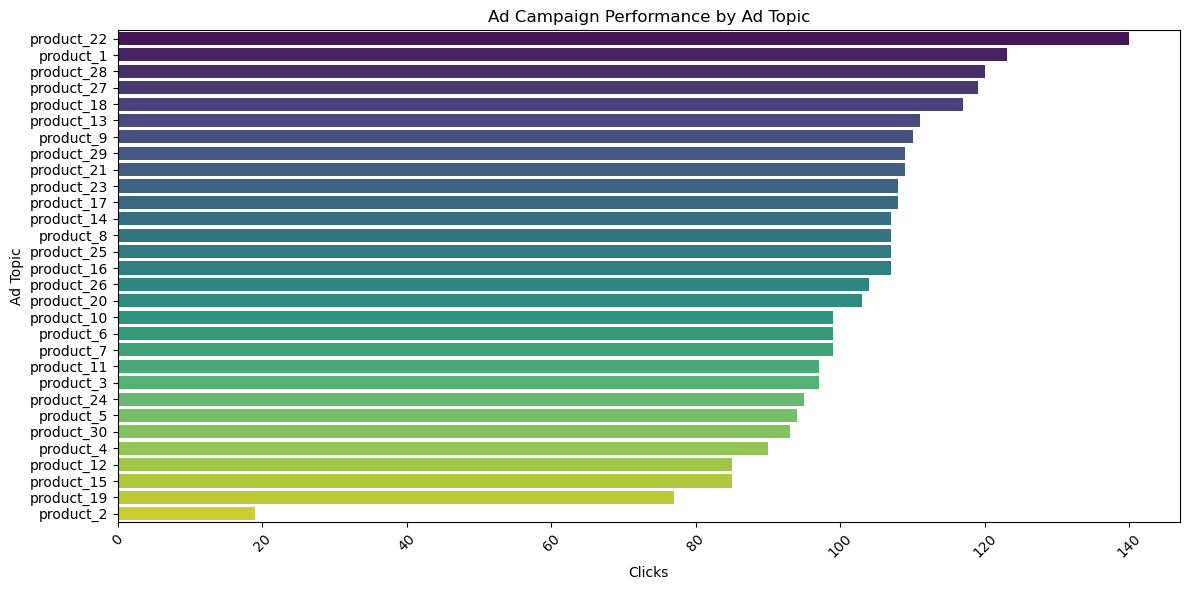

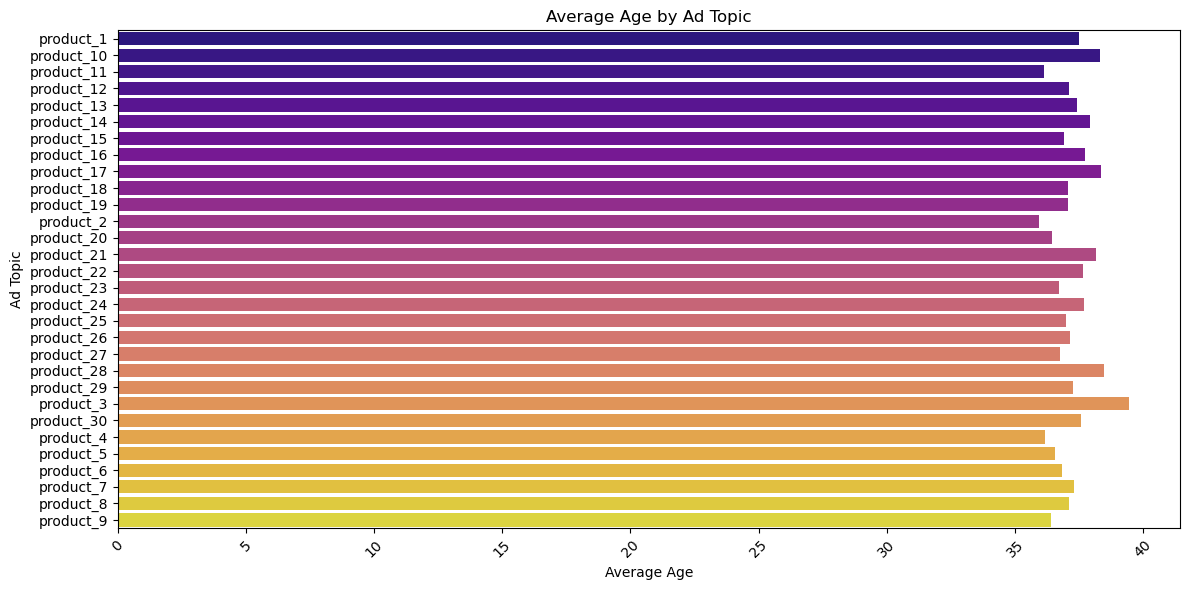

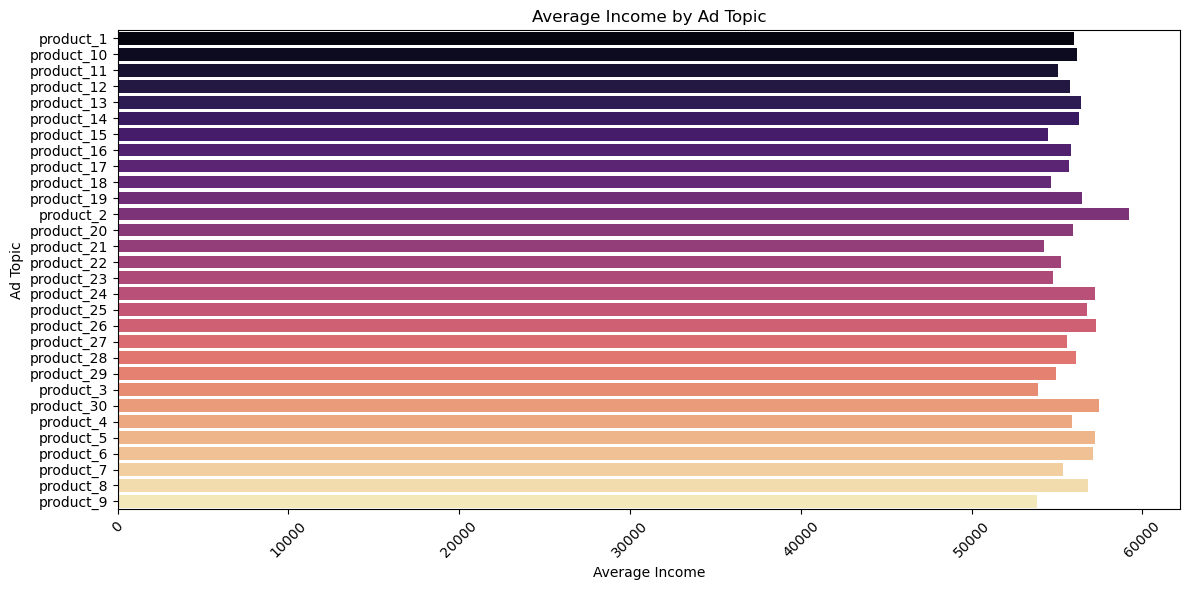

In [23]:
# Group the data by Ad_Topic and analyze clicks
ad_topic_clicks = data.groupby('Ad_Topic')['Clicked'].sum().sort_values(ascending=False)

# Visualize the performance of different ad topics using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=ad_topic_clicks.values, y=ad_topic_clicks.index, palette='viridis')
plt.xlabel('Clicks')
plt.ylabel('Ad Topic')
plt.title('Ad Campaign Performance by Ad Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evaluate the relationship between ad topics and user demographics (Age and Avg_Income)

# Calculate average age and income for each ad topic
ad_topic_demographics = data.groupby('Ad_Topic')[['Age', 'Avg_Income']].mean()

# Visualize the relationship between ad topics and average age using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=ad_topic_demographics, x='Age', y=ad_topic_demographics.index, palette='plasma')
plt.xlabel('Average Age')
plt.ylabel('Ad Topic')
plt.title('Average Age by Ad Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the relationship between ad topics and average income using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=ad_topic_demographics, x='Avg_Income', y=ad_topic_demographics.index, palette='magma')
plt.xlabel('Average Income')
plt.ylabel('Ad Topic')
plt.title('Average Income by Ad Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


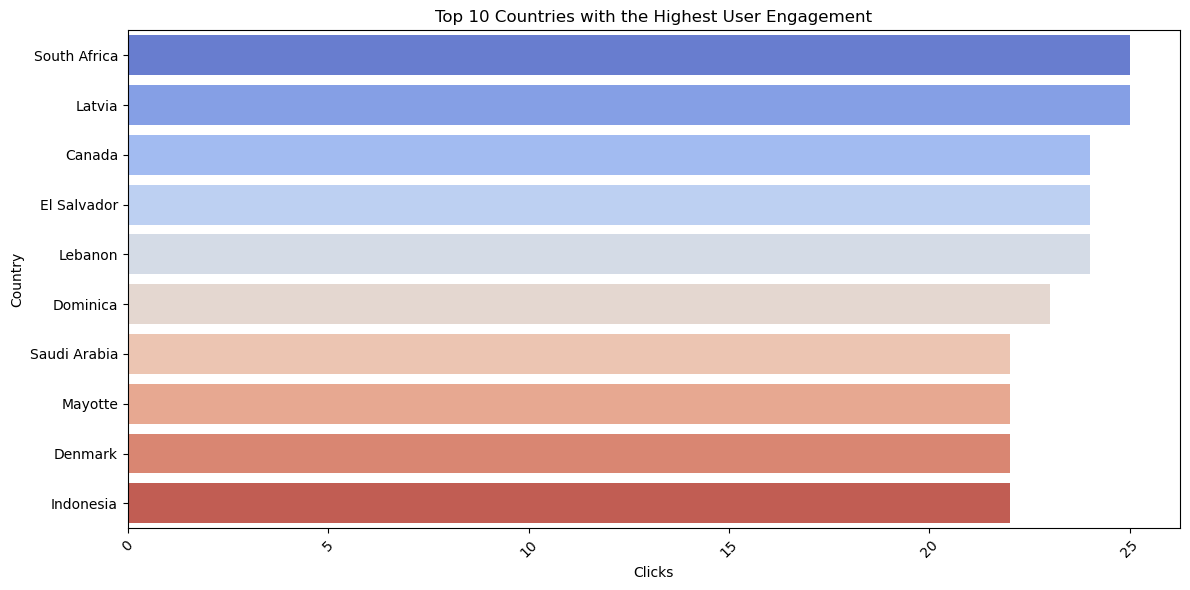

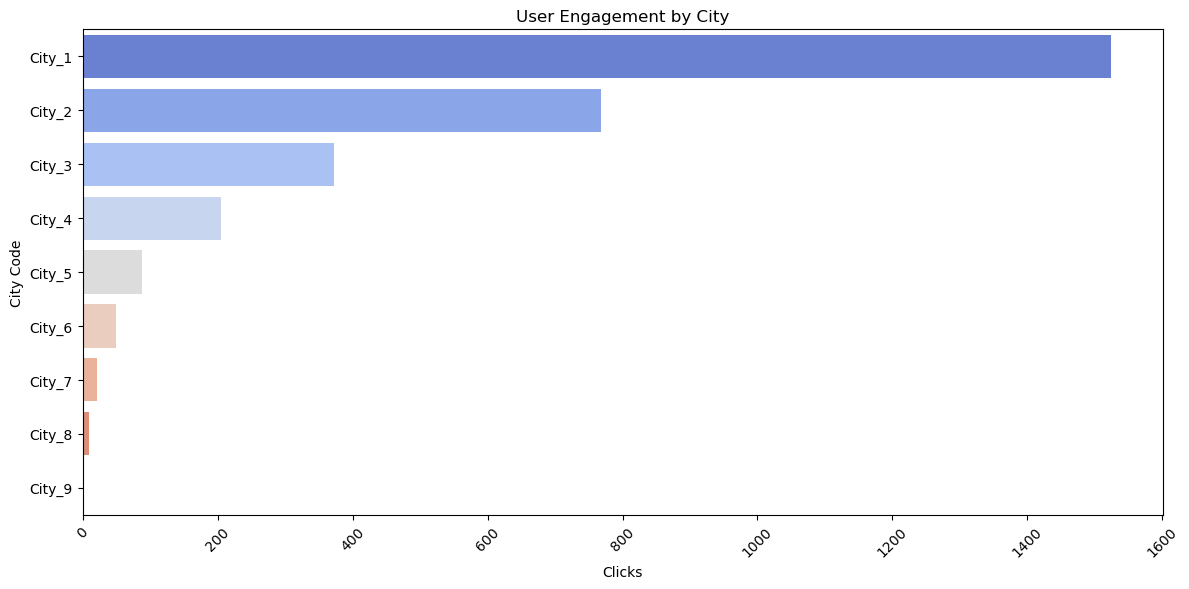

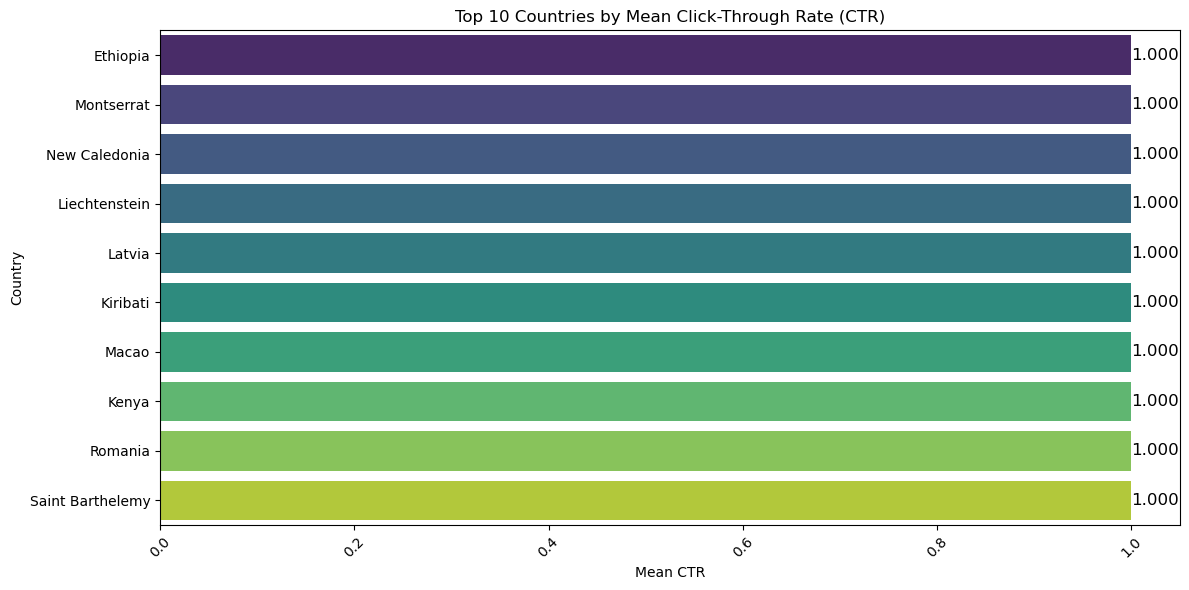

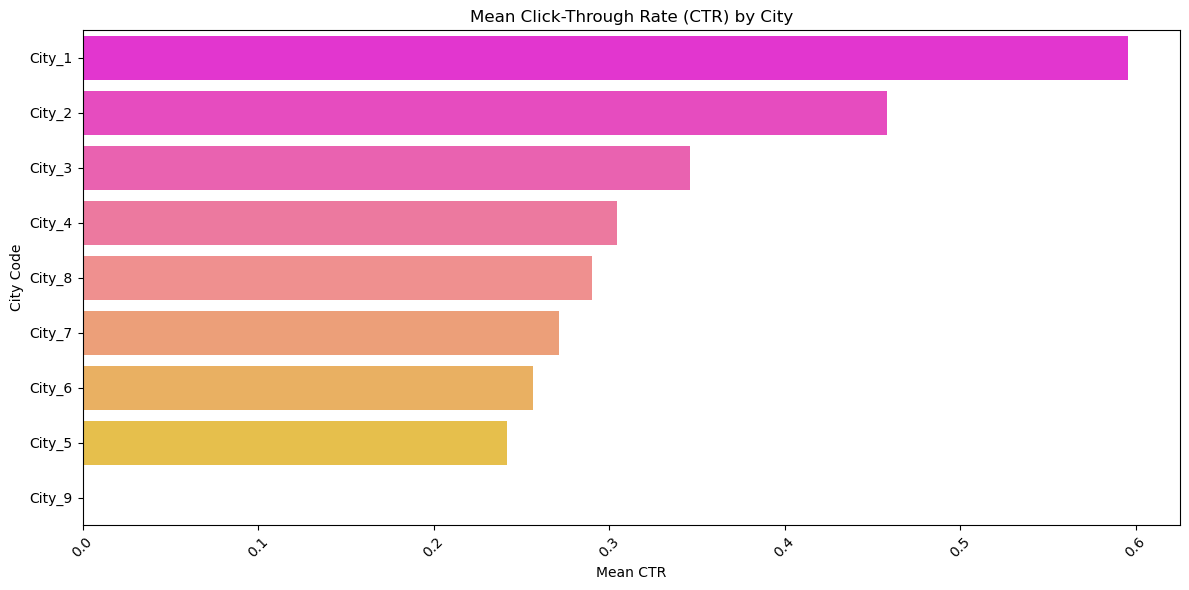

In [27]:
# Group the data by Country_Name and calculate the total clicks in each country
country_clicks = data.groupby('Country_Name')['Clicked'].sum().sort_values(ascending=False)

# Group the data by City_code and calculate the total clicks in each city
city_clicks = data.groupby('City_code')['Clicked'].sum().sort_values(ascending=False)

# Identify regions with the highest user engagement

# Visualize the top 10 countries with the highest user engagement using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=country_clicks.values[:10], y=country_clicks.index[:10], palette='coolwarm')
plt.xlabel('Clicks')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest User Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the top cities with the highest user engagement using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=city_clicks.values, y=city_clicks.index, palette='coolwarm')
plt.xlabel('Clicks')
plt.ylabel('City Code')
plt.title('User Engagement by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Explore differences in ad performance across countries or cities

# Group the data by Country_Name and calculate the mean click-through rate (CTR) for each country
country_ctr = data.groupby('Country_Name')['Clicked'].mean().sort_values(ascending=False)

# Group the data by City_code and calculate the mean CTR for each city
city_ctr = data.groupby('City_code')['Clicked'].mean().sort_values(ascending=False)

# Visualize the mean CTR by top 10 countries using a bar chart with a distinct color palette
top_10_country_ctr = country_ctr.head(10)  # Select the top 10 countries with the highest CTR
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_country_ctr.values, y=top_10_country_ctr.index, palette='viridis')  # Use 'viridis' color palette
plt.xlabel('Mean CTR')
plt.ylabel('Country')
plt.title('Top 10 Countries by Mean Click-Through Rate (CTR)')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels to the bars for clarity
for index, value in enumerate(top_10_country_ctr.values):
    plt.text(value, index, f'{value:.3f}', va='center', fontsize=12)

plt.show()



# Visualize the mean CTR by city using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=city_ctr.values, y=city_ctr.index, palette='spring')
plt.xlabel('Mean CTR')
plt.ylabel('City Code')
plt.title('Mean Click-Through Rate (CTR) by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


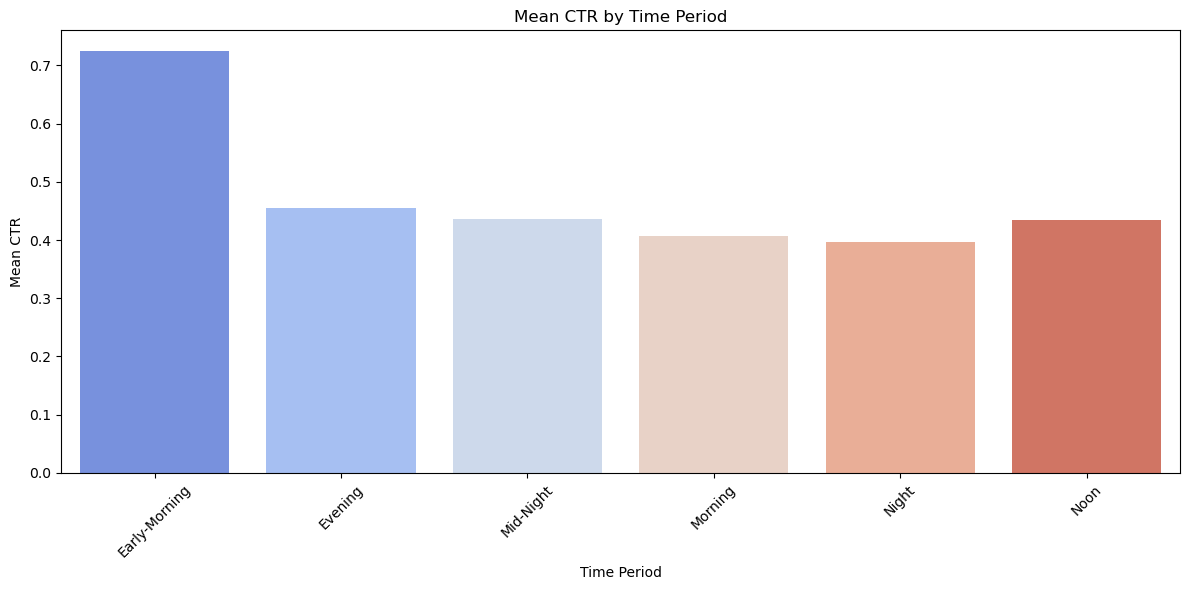

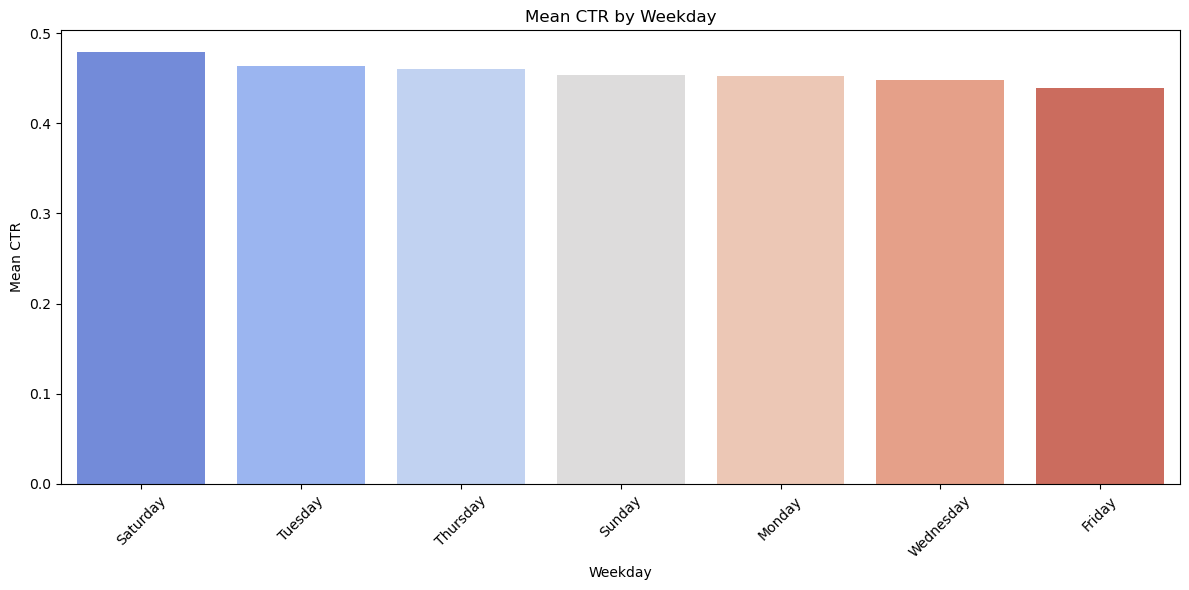

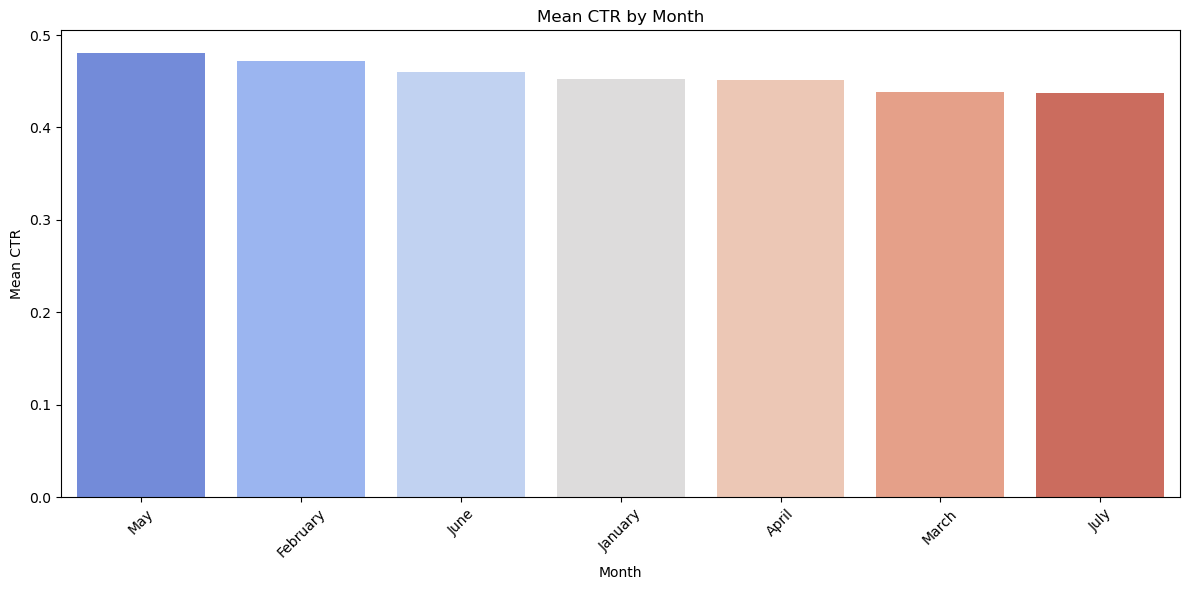

C:\Users\ankit\AppData\Local\Temp\ipykernel_15964\1079785376.py:62: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = clicks_by_year_month.pivot('Year', 'Month', 'Clicked')


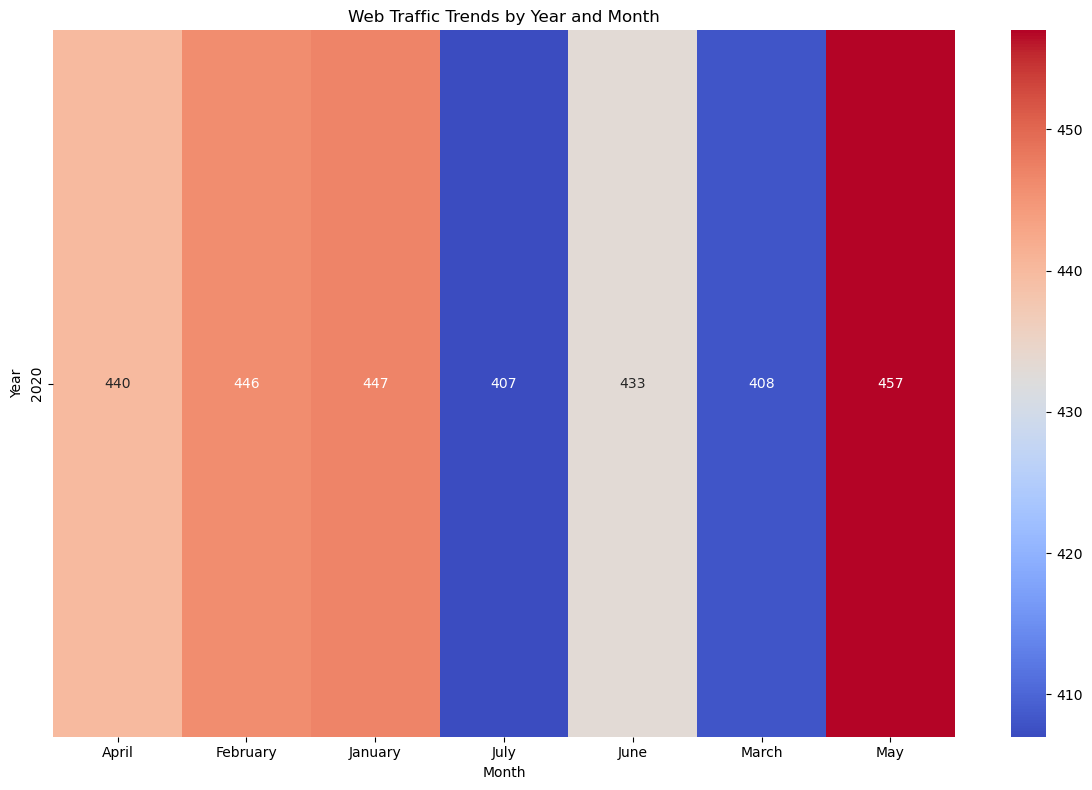

In [29]:
# Time Analysis

# Convert 'Time_Period' to a categorical data type if it's not already
data['Time_Period'] = pd.Categorical(data['Time_Period'])

# Examine user behavior by Time_Period, Weekday, Month, and Year

# Determine the best time periods for customer engagement
time_period_engagement = data.groupby('Time_Period')['Clicked'].mean().sort_values(ascending=False)

# Visualize the mean Click-Through Rate (CTR) by time period using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=time_period_engagement.index, y=time_period_engagement.values, palette='coolwarm')
plt.xlabel('Time Period')
plt.ylabel('Mean CTR')
plt.title('Mean CTR by Time Period')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Determine the best weekdays for customer engagement
weekday_engagement = data.groupby('Weekday')['Clicked'].mean().sort_values(ascending=False)

# Visualize the mean CTR by weekday using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_engagement.index, y=weekday_engagement.values, palette='coolwarm')
plt.xlabel('Weekday')
plt.ylabel('Mean CTR')
plt.title('Mean CTR by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Determine the best months for customer engagement
month_engagement = data.groupby('Month')['Clicked'].mean().sort_values(ascending=False)

# Visualize the mean CTR by month using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=month_engagement.index, y=month_engagement.values, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Mean CTR')
plt.title('Mean CTR by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze trends and seasonality in web traffic by Year and Month

# Group data by Year and Month and calculate the total clicks
clicks_by_year_month = data.groupby(['Year', 'Month'])['Clicked'].sum()

# Reset the index to make it easier to plot
clicks_by_year_month = clicks_by_year_month.reset_index()

# Create a pivot table for heatmap visualization
heatmap_data = clicks_by_year_month.pivot('Year', 'Month', 'Clicked')

# Visualize web traffic trends using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Web Traffic Trends by Year and Month')
plt.tight_layout()
plt.show()


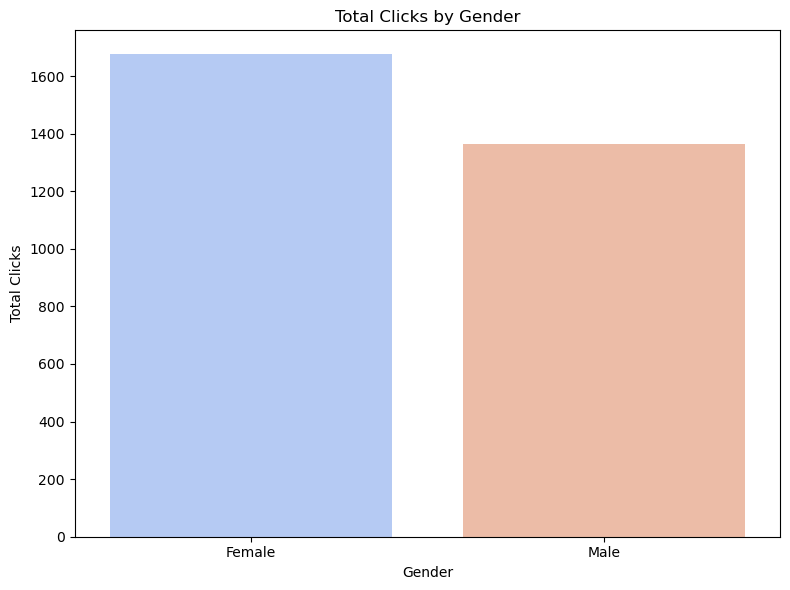

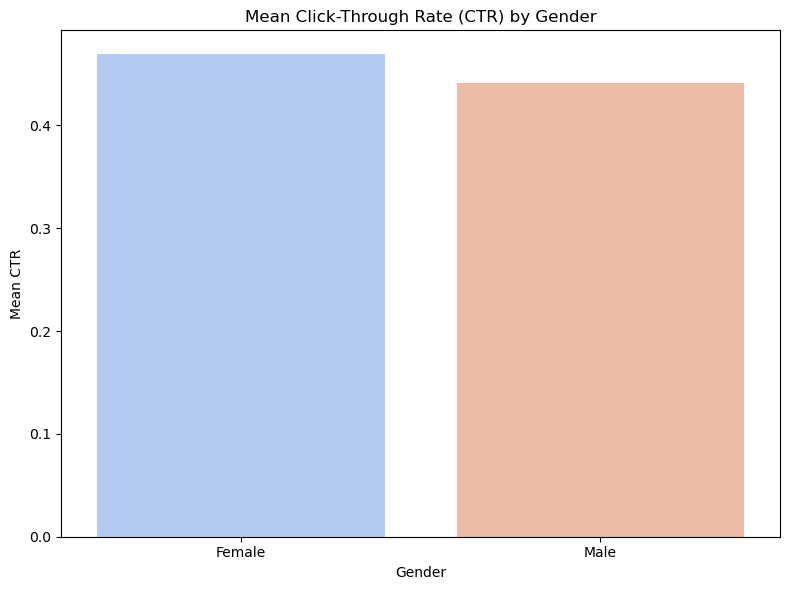

In [30]:
# Gender Analysis

# Investigate the impact of gender (Male) on user behavior and ad engagement

# Group data by gender and calculate the total clicks for each gender
gender_clicks = data.groupby('Male')['Clicked'].sum()

# Visualize the total clicks by gender using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_clicks.index, y=gender_clicks.values, palette='coolwarm')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Total Clicks')
plt.title('Total Clicks by Gender')
plt.tight_layout()
plt.show()

# Compare the click-through rates between male and female users

# Group data by gender and calculate the mean Click-Through Rate (CTR) for each gender
gender_ctr = data.groupby('Male')['Clicked'].mean()

# Visualize the mean CTR by gender using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_ctr.index, y=gender_ctr.values, palette='coolwarm')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Mean CTR')
plt.title('Mean Click-Through Rate (CTR) by Gender')
plt.tight_layout()
plt.show()
